In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import itertools
%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [11]:
df = pd.read_csv("car_data.csv")

##Part 1

In [26]:
m_v_p_reg = linear_model.LinearRegression()
m_v_p_x = np.array(df['Mileage'].values).reshape((-1,1))
m_v_p_y = np.array(df['Price'].values)
m_v_p_reg.fit(m_v_p_x, m_v_p_y)
print('The equation for the linear regression line is')
print(m_v_p_reg.coef_, m_v_p_reg.intercept_)

print('\nWith a r^2 score of {}, this line is not a good fit for the data'.format(m_v_p_reg.score(m_v_p_x, m_v_p_y)))

The equation for the linear regression line is
[-0.1725205] 24764.5590061

With a r^2 score of 0.02046344732348948, this line is not a good fit for the data


<function matplotlib.pyplot.show>

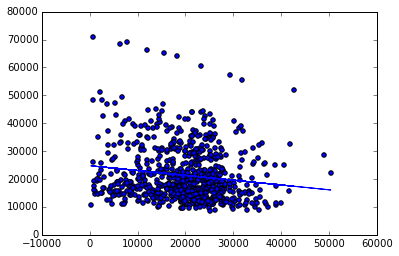

In [27]:
plt.scatter(m_v_p_x, m_v_p_y)
plt.plot(m_v_p_x, m_v_p_reg.predict(m_v_p_x), color='blue')
plt.show

##Part 2

In [35]:
def regression_for(combo):
    combo = list(combo)
    df = features.loc[:, combo + ['Price']]
    df.dropna(inplace=True)
    input_data = df[combo]
    price = df['Price']
    regr = linear_model.LinearRegression()
    regr.fit(input_data, price)
    return regr, regr.score(input_data, price)


In [39]:
#Prepare the data
features = df
price = np.array(df['Price'].values)
dependent_vars = list(features.columns)
features.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [51]:
dependent_vars = list(features.columns)
dependent_vars.remove('Make')
dependent_vars.remove('Model')
dependent_vars.remove('Trim')
dependent_vars.remove('Type')
dependent_vars.remove('Price')

In [79]:
all_v_price_reg = linear_model.LinearRegression()
all_v_price_x = df[dependent_vars]
all_v_price_reg.fit(all_v_price_x, price)
print('The score for mileage, cylinders, liters, doors, cruise, sound, and leather to price is {}'.format(all_v_price_reg.score(all_v_price_x, price)))

#Find the most linked variables
choices = []
for x in range(1,8):
    combos = list(itertools.combinations(dependent_vars, x))
    for combo in combos:
        regr, score = regression_for(combo)
        choices.append((combo, score))
        
# Display the most linked variable
best = sorted(choices, key=lambda x: x[1])[-1]
regr, score = regression_for(best[0])
print('The list of variables most linked to price is \n{}\nWith a score of {}\nAnd a coeffciants of {}'.format(best[0], best[1], regr.coef_))
print('\n\n')

the score for mileage, cylinders, liters, doors, cruise, sound, and leather to price is 0.446264353672838
The list of variables most linked to price is 
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')
With a score of 0.446264353672838
And a coeffciant of [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03]



